In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, r2_score, plot_confusion_matrix

In [9]:
TrainingData = pd.read_csv("/home/tintin/Study/Data-Science/Statistical-Machine-Learning/Learn-Support-Vector-Machine/Datasets/Social_Network_Ads_Train.csv")
TestingData = pd.read_csv("/home/tintin/Study/Data-Science/Statistical-Machine-Learning/Learn-Support-Vector-Machine/Datasets/Social_Network_Ads_Test.csv")
TrainingData

,Unnamed: 0,User ID,Gender,Age,EstimatedSalary,Purchased
0,0,15624510,Male,19,19000,0
1,1,15810944,Male,35,20000,0
2,2,15668575,Female,26,43000,0
3,3,15603246,Female,27,57000,0
4,4,15804002,Male,19,76000,0
...,...,...,...,...,...,...
295,295,15725794,Female,36,63000,0
296,296,15673539,Male,42,73000,1
297,297,15705298,Female,43,112000,1
298,298,15675791,Male,45,79000,0


In [10]:
X_train = TrainingData.iloc[:, [3,4]].values
Y_train = TrainingData.iloc[:,5].values
X_test = TestingData.iloc[:,[3,4]].values
Y_test = TestingData.iloc[:,5].values

In [11]:
# Data preprocessing
SC = StandardScaler()
X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)

In [12]:
def VisualizingDataset(X_, Y_):
    X1 = X_[:, 0]
    X2 = X_[:, 1]
    for i, label in enumerate(np.unique(Y_)):
        plt.scatter(X1[Y_ == label], X2[Y_ == label])

In [13]:
def VisualizingResult(model, X_):
    X1 = X_[:, 0]
    X2 = X_[:, 1]
    X1_range = np.arange(start= X1.min()-1, stop= X1.max()+1, step = 0.01)
    X2_range = np.arange(start= X2.min()-1, stop= X2.max()+1, step = 0.01)
    X1_matrix, X2_matrix = np.meshgrid(X1_range, X2_range)
    X_grid= np.array([X1_matrix.ravel(), X2_matrix.ravel()]).T
    Y_grid= model.predict(X_grid).reshape(X1_matrix.shape)
    plt.contourf(X1_matrix, X2_matrix, Y_grid, alpha = 0.5, cmap = ListedColormap(("red", "green")))

In [14]:
classifier = SVC(kernel = "linear")
classifier.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

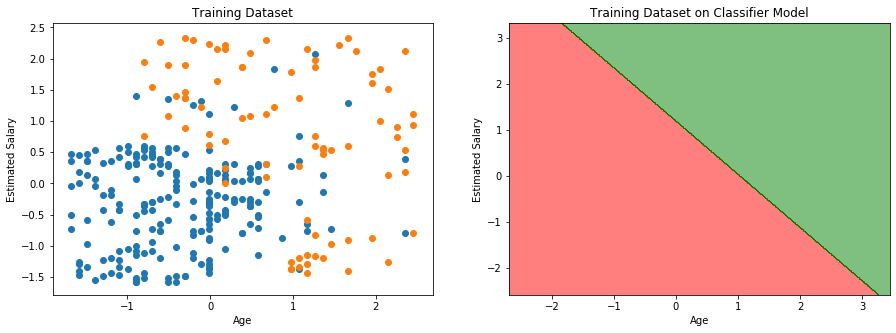

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Training Dataset")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
VisualizingDataset(X_train, Y_train)
plt.subplot(1,2,2)
plt.title("Training Dataset on Classifier Model")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
VisualizingResult(classifier, X_train)
plt.show()

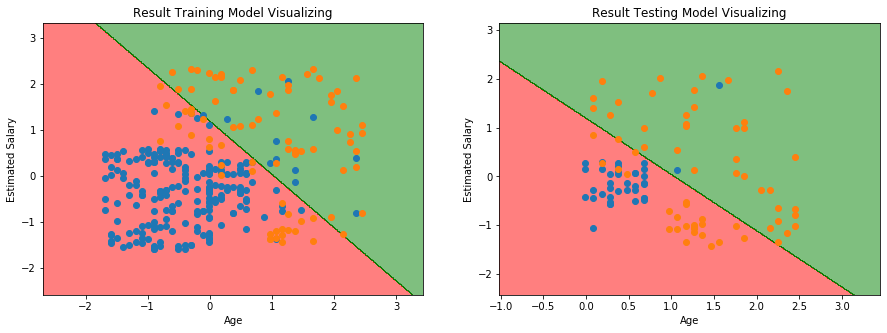

In [16]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)

plt.title("Result Training Model Visualizing")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
VisualizingResult(classifier, X_train)
VisualizingDataset(X_train, Y_train)

plt.subplot(1,2,2)
plt.title("Result Testing Model Visualizing")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")

VisualizingResult(classifier, X_test)
VisualizingDataset(X_test, Y_test)
plt.show()

Confusion matrix of training model:  [[208  11]
 [ 31  50]]
Confusion matrix of testing model:  [[36  2]
 [24 38]]


Text(0.5, 1.0, 'Confusion Matrix of Testing Set - SVM')

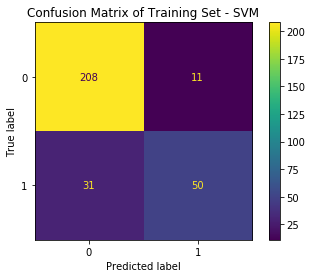

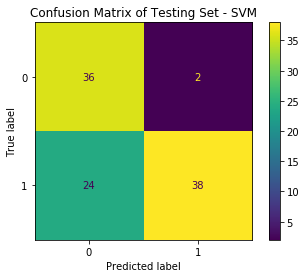

In [17]:
# Evaluating training and testing model
cm = confusion_matrix(Y_train, classifier.predict(X_train))
plot_confusion_matrix(classifier, X_train, Y_train)
plt.title('Confusion Matrix of Training Set - SVM')
print("Confusion matrix of training model: ",cm)

cm = confusion_matrix(Y_test, classifier.predict(X_test))
print("Confusion matrix of testing model: ",cm)
plot_confusion_matrix(classifier, X_test, Y_test)
plt.title('Confusion Matrix of Testing Set - SVM')


In [18]:
accuracy_score = classifier.score(X_test, Y_test)
print("Accuracy of training model: ", classifier.score(X_train,Y_train))
print("Accuracy of testing model: ",accuracy_score)

Accuracy of training model:  0.86
Accuracy of testing model:  0.74


In [19]:
def compare(i_example):
    x = X_test[i_example : i_example + 1]
    y = Y_test[i_example]
    y_pred = classifier.predict(x)
    x_inv = SC.inverse_transform(x)
    print(x_inv, y, y_pred)

In [20]:
for i in range(7, 12):
    compare(i)

[[4.70e+01 1.13e+05]] 1 [1]
[[3.60e+01 1.25e+05]] 1 [1]
[[3.8e+01 5.0e+04]] 0 [0]
[[4.2e+01 7.0e+04]] 0 [0]
[[3.9e+01 9.6e+04]] 1 [1]
